<a href="https://colab.research.google.com/github/andraroman12/PMP-2024/blob/main/Lab10/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

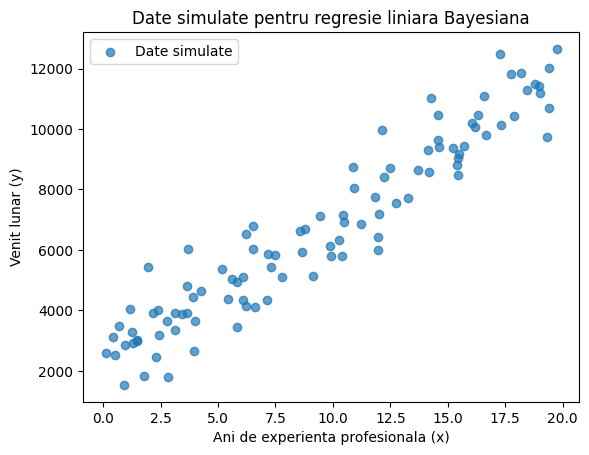

Output()

Output()

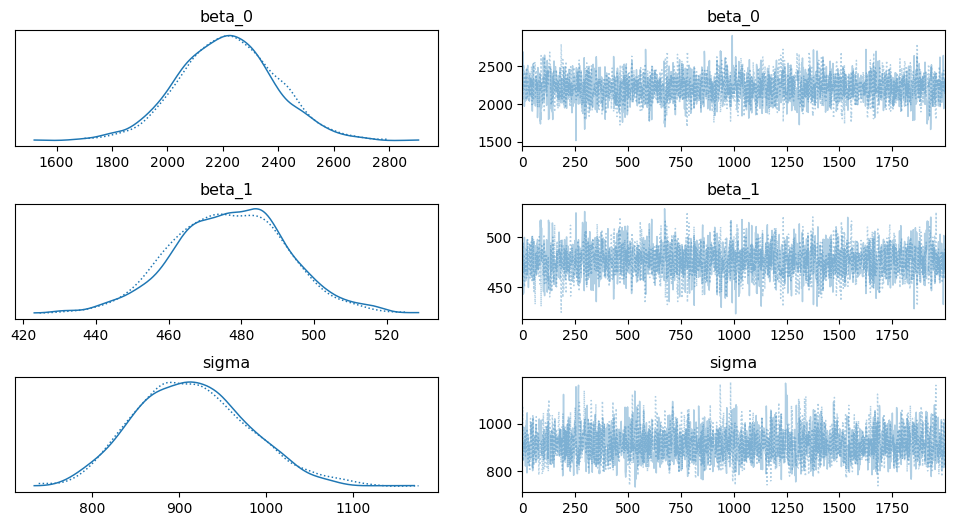

In [4]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

np.random.seed(42)
n_observations = 100

x = np.random.uniform(0, 20, size=n_observations) #pt anii de experienta
beta_0 = 2000  #venitul de baza
beta_1 = 500   #cresterea
sigma = 1000   #zgomotul
y=beta_0+beta_1*x+np.random.normal(0,sigma,size=n_observations)

plt.scatter(x, y, alpha=0.7, label="Date simulate")
plt.xlabel("Ani de experienta profesionala (x)")
plt.ylabel("Venit lunar (y)")
plt.title("Date simulate pentru regresie liniara Bayesiana")
plt.legend()
plt.show()


with pm.Model() as model:

    beta_0_prior = pm.Normal("beta_0", mu=0, sigma=10000)
    beta_1_prior = pm.Normal("beta_1", mu=0, sigma=1000)
    sigma_prior = pm.HalfNormal("sigma", sigma=1000)
    #media predictiei
    mu=beta_0_prior+beta_1_prior*x

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma_prior, observed=y)

    trace = pm.sample(2000, return_inferencedata=True, progressbar=True)

with model:
    pm.plot_trace(trace)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

